In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re

# df = pd.read_csv('conv_history.csv').loc[:, "message":]
# df.message.str.replace('[^a-zA-Z0-9\s]', '')

In [123]:
for i in range(20):
    
    print(df.values[i][2])
    
    #cool! time already ordered
    
    

Jan 31, 2017 10:59pm
Jan 31, 2017 11:07pm
Feb 01, 2017 5:06am
Feb 01, 2017 6:35am
Feb 01, 2017 6:36am
Feb 01, 2017 8:32am
Feb 02, 2017 6:04pm
Feb 02, 2017 6:07pm
Feb 02, 2017 6:07pm
Feb 02, 2017 6:07pm
Feb 02, 2017 6:07pm
Feb 02, 2017 6:07pm
Feb 02, 2017 6:08pm
Feb 02, 2017 6:08pm
Feb 02, 2017 6:08pm
Feb 02, 2017 6:08pm
Feb 02, 2017 6:09pm
Feb 02, 2017 6:09pm
Feb 02, 2017 6:09pm
Feb 02, 2017 6:09pm


In [121]:
import calendar
import datetime
import matplotlib as mpl

month_dic = dict((v,k) for k,v in enumerate(calendar.month_abbr))

def msg_date_to_num(date):
    t_c = re.match(r'(.*) (.*), (.*) (.*):(.*)(am|pm)', date)

    year = int(t_c.group(3))
    month = month_dic[t_c.group(1)]
    day = int(t_c.group(2))
    hour = int(t_c.group(4))
    mint = int(t_c.group(5))

    dt = datetime.datetime(year, month, day, hour, mint)
    return mpl.dates.date2num(dt)

msg_date_to_num('Feb 01, 2017 5:06am')

736361.2125

In [129]:
len_dist_brian = np.array([df.message[i].count(' ') for i in range(len(df)) if df.sender[i] == "Brian Li" and len(df.message[i]) < 300]).reshape(1, 6529)
len_dist_michael = np.array([df.message[i].count(' ') for i in range(len(df)) if df.sender[i] == "Michael Sun" and len(df.message[i]) < 300]).reshape(1, 9132)
dates_brian = np.array([df.iloc[i][2] for i in range(len(df)) if df.sender[i] == "Brian Li" and len(df.message[i]) < 300]).reshape(1, 6529)
dates_michael = np.array([df.iloc[i][2] for i in range(len(df)) if df.sender[i] == "Michael Sun" and len(df.message[i]) < 300]).reshape(1, 9132)

time_series_brian = np.array([msg_date_to_num(date) for date in dates_brian[0]])
time_series_michael = np.array([msg_date_to_num(date) for date in dates_michael[0]])

array([736360.45763889, 736360.46319444, 736361.27430556, ...,
       737003.26944444, 737003.32708333, 737003.32777778])

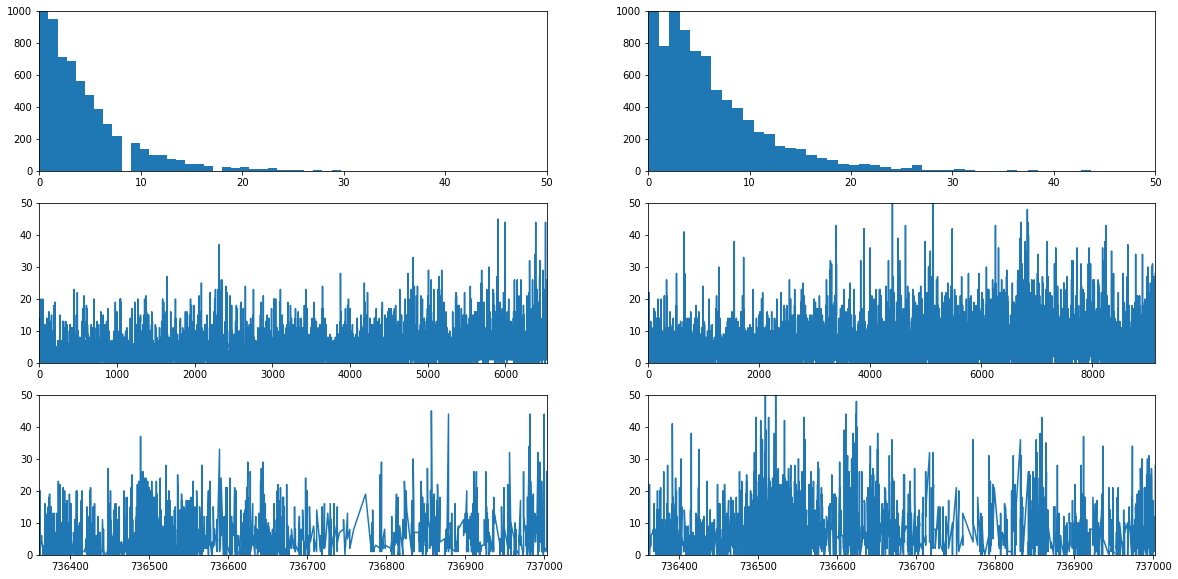

In [133]:
fig, axs = plt.subplots(3, 2, figsize = (20, 10))

axs[0, 0].axis([0, 50, 0, 1000])
axs[0, 0].hist(len_dist_brian[0], 50)
axs[0, 1].axis([0, 50, 0, 1000])
axs[0, 1].hist(len_dist_michael[0], 50)

axs[1, 0].plot([i for i in range(len(len_dist_brian[0]))], len_dist_brian[0])
axs[1, 0].axis([0, len(len_dist_brian[0]), 0, 50])
axs[1, 1].plot([i for i in range(len(len_dist_michael[0]))], len_dist_michael[0])
axs[1, 1].axis([0, len(len_dist_michael[0]), 0, 50])

axs[2, 0].plot(time_series_brian, len_dist_brian[0])
axs[2, 0].axis([time_series_brian[0], time_series_brian[-1], 0, 50])

axs[2, 1].plot(time_series_michael, len_dist_michael[0])
axs[2, 1].axis([time_series_michael[0], time_series_michael[-1], 0, 50])

plt.show()